### Imports

**Required imports**

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as scipy
import statsmodels.formula.api as smf

from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator



pd.set_option('display.max_rows', None)



### Read the big data file

In [23]:
dfs_all_years_final = pd.read_csv("../student-data.csv")

### General tables and graphs about the data collected

**Print student submissions**

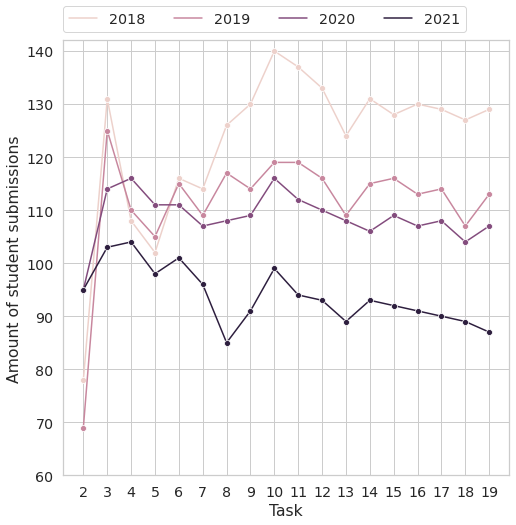

In [24]:

df = dfs_all_years_final.copy()
df = df[["year","task","student"]].drop_duplicates()
total_repos_tasks = df.groupby(["year","task"]).agg(total_students=("student","count"))
repo_data = total_repos_tasks.reset_index()
#sns.set_palette('CMRmap')
sns.set_theme(style="whitegrid", palette="pastel")
sns.set_context("notebook", font_scale=1.3)
g = sns.lineplot(x="task",y="total_students",data=repo_data,hue="year",marker="o");
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=10)
g.set(xlabel="Task");
g.set(ylabel="Amount of student submissions")
g.set(ylim=(60,142))
g.set(xticks=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]);


**List all violations used**

In [25]:
df = dfs_all_years_final.copy()
rules = df[["violation"]].drop_duplicates()
rules.sort_values("violation");

### Kruskal-Wallis test

2021: 2 4 5 8 10 11 13

2020: 13 6 14 3 9 1 7 4 5

2019: 9 13 8 10 2 12 6 11 3

**On total violations per student**

In [26]:
df = dfs_all_years_final.copy()

#df = df[df["violation"] != "MagicNumber"]
#df = df[df["violation"] != "SystemPrintln"]
#df = df[df["violation"] != "CommentRequired"]

df = df.groupby(["year","task","ta","student"]).agg(total_count=("amount","sum"),vPkloc=("vPkloc","sum"))



area = "vPkloc"

list = []
for year, grp_year in df.groupby("year"):
    row = {}
    row["year"] = year
    for task,grp_task in grp_year.groupby("task"):
        row["task"] = task
        grp_ta = grp_task.groupby("ta")
        
        if year == 2021:
            res = scipy.kruskal(grp_ta.get_group(2)[area],grp_ta.get_group(4)[area],grp_ta.get_group(5)[area],grp_ta.get_group(8)[area],grp_ta.get_group(10)[area],grp_ta.get_group(11)[area],grp_ta.get_group(13)[area])
        elif year == 2020:
            res = scipy.kruskal(grp_ta.get_group(1)[area],grp_ta.get_group(3)[area],grp_ta.get_group(4)[area],grp_ta.get_group(5)[area],grp_ta.get_group(6)[area],grp_ta.get_group(7)[area],grp_ta.get_group(9)[area],grp_ta.get_group(13)[area],grp_ta.get_group(14)[area])
        elif year == 2019:
            res = scipy.kruskal(grp_ta.get_group(9)[area],grp_ta.get_group(13)[area],grp_ta.get_group(8)[area],grp_ta.get_group(10)[area],grp_ta.get_group(2)[area],grp_ta.get_group(12)[area],grp_ta.get_group(6)[area],grp_ta.get_group(11)[area],grp_ta.get_group(3)[area])
        elif year == 2018:
            res = scipy.kruskal(grp_ta.get_group(1)[area],grp_ta.get_group(2)[area],grp_ta.get_group(14)[area],grp_ta.get_group(9)[area],grp_ta.get_group(3)[area],grp_ta.get_group(12)[area],grp_ta.get_group(10)[area],grp_ta.get_group(11)[area],grp_ta.get_group(8)[area],grp_ta.get_group(13)[area],grp_ta.get_group(5)[area])
        row["Statistic"] = res[0]
        row["P-value"] = res[1]
        

        frame = pd.Series(row)
        list.append(frame)
    
final_frame = pd.concat(list,axis = 1).T
sorted = final_frame[(final_frame["P-value"] < 0.05)]



final = sorted[["year","task","P-value"]]

final["P-value"] = final["P-value"].round(decimals=3)
final["year"] = final["year"].astype('int64')
final["task"] = final["task"].astype('int64')

#print(final.to_latex(index=False))



/tmp/ipykernel_590/1792811277.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["P-value"] = final["P-value"].round(decimals=3)
/tmp/ipykernel_590/1792811277.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["year"] = final["year"].astype('int64')
/tmp/ipykernel_590/1792811277.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

**Per each violation**

In [27]:
area = "amount"

list = []

df = dfs_all_years_final.copy()
for year, grp_year in df.groupby("year"):
    row = {}
    row["year"] = year
    for violation,grp_violation in grp_year.groupby("violation"):
        
        row["violation"] = violation
        for task, grp_task in grp_violation.groupby("task"):
            row["task"] = task
            try:
                grp_ta = grp_task.groupby("ta")
                if year == 2021:
                    res = scipy.kruskal(grp_ta.get_group(2)[area],grp_ta.get_group(4)[area],grp_ta.get_group(5)[area],grp_ta.get_group(8)[area],grp_ta.get_group(10)[area],grp_ta.get_group(11)[area],grp_ta.get_group(13)[area])
                elif year == 2020:
                    res = scipy.kruskal(grp_ta.get_group(1)[area],grp_ta.get_group(3)[area],grp_ta.get_group(4)[area],grp_ta.get_group(5)[area],grp_ta.get_group(6)[area],grp_ta.get_group(7)[area],grp_ta.get_group(9)[area],grp_ta.get_group(13)[area],grp_ta.get_group(14)[area])
                elif year == 2019:
                    res = scipy.kruskal(grp_ta.get_group(9)[area],grp_ta.get_group(13)[area],grp_ta.get_group(8)[area],grp_ta.get_group(10)[area],grp_ta.get_group(2)[area],grp_ta.get_group(12)[area],grp_ta.get_group(6)[area],grp_ta.get_group(11)[area],grp_ta.get_group(3)[area])
                elif year == 2018:
                    res = scipy.kruskal(grp_ta.get_group(1)[area],grp_ta.get_group(2)[area],grp_ta.get_group(14)[area],grp_ta.get_group(9)[area],grp_ta.get_group(3)[area],grp_ta.get_group(12)[area],grp_ta.get_group(10)[area],grp_ta.get_group(11)[area],grp_ta.get_group(8)[area],grp_ta.get_group(13)[area],grp_ta.get_group(5)[area])
                rejectnull = res[1] < 0.05
                row["reject"] = rejectnull
                row["p-value"] = res[1]
            except:
                row["reject"] = None
                row["p-value"] = None

            frame = pd.Series(row)
            list.append(frame)

final_frame = pd.concat(list,axis = 1).T
final_frame[(final_frame["reject"] == True)]
len(final_frame[(final_frame["p-value"] < 0.05)])
len(final_frame[(final_frame["p-value"] < 0.05)].sort_values(by="task"))
result = final_frame[(final_frame["p-value"] < 0.05)].sort_values(by=["year","violation"])



#final_frame
result2 = result.groupby(["year","violation"]).agg(tasks = ("task","count")).reset_index()
#display(result2)
#result2#[(result["year"] == 2019) & (result["violation"] == "CommentRequired")]

#result2.set_index(["year", "violation"]).unstack(level=0);



**Print the amount of times each violation rejects null hyp every year**

In [28]:
df = result2.set_index(["year", "violation"]).unstack(level=0)
df = df.replace(np.nan, 0).reset_index()
df.columns = ['violation','2018','2019','2020','2021']
df[['2018','2019','2020','2021']] = df[['2018','2019','2020','2021']].astype('int64')
#df

**PostHoc test after kruskalwallis**

In [29]:
rule = "CommentRequired"
task = 8
year = 2019
data = dfs_all_years_final[dfs_all_years_final["year"] == year].copy()
data_rule = data.copy()
data_rule = data_rule[data_rule["violation"] == rule]
data_rule = data_rule[data_rule["task"] == task]
#sp.posthoc_conover(data_rule, val_col='amount', group_col='ta', p_adjust ='holm')

### Linear regression plots

**Generate linear regression data with all rules included**

In [30]:
dfs_copy = dfs_all_years_final.copy()
#dfs_copy = dfs_copy[dfs_copy["violation"] != "MagicNumber"]
#dfs_copy = dfs_copy[dfs_copy["violation"] != "SystemPrintln"]
#dfs_copy = dfs_copy[dfs_copy["violation"] != "CommentRequired"]
dfs_copy = dfs_copy[dfs_copy["violation"] != "Indentation"]
dfs_year_sum = dfs_copy.groupby(["year","task","student"]).agg(vPkloc = ("vPkloc","sum")).reset_index()
df = dfs_year_sum.copy()
df['All rules'] = True
dfs_year_sum.head(30);

list= []
for year,grp_year in dfs_year_sum.groupby("year"):
    lm1 = smf.ols(formula='vPkloc ~ task',data=grp_year).fit()
    frame = pd.Series({"year": int(year),"Intercept": lm1.params[0],"Slope": lm1.params[1], "R2": lm1.rsquared, "P-value":lm1.pvalues[1]})
    list.append(frame)
final_frame = pd.concat(list,axis = 1).T

#

#dfs_all_years_final[(dfs_all_years_final["student"] == "fasl") & (dfs_all_years_final["task"] == 8)]

#print(final_frame.to_latex(index=False))
final = final_frame.copy()

#final["P-value"] = final["P-value"].round(decimals=3)
final["Intercept"] = final["Intercept"].round(decimals=3)
final["Slope"] = final["Slope"].round(decimals=3)
final["R2"] = final["R2"].round(decimals=3)

final["year"] = final["year"].astype('int64')
final_all = final.copy()
#print(final.to_latex(index=False))

**Generate linear regression data with the three most popular removed**

In [31]:
dfs_copy = dfs_all_years_final.copy()
dfs_copy = dfs_copy[dfs_copy["violation"] != "MagicNumber"]
dfs_copy = dfs_copy[dfs_copy["violation"] != "SystemPrintln"]
dfs_copy = dfs_copy[dfs_copy["violation"] != "CommentRequired"]
dfs_copy = dfs_copy[dfs_copy["violation"] != "Indentation"]
dfs_year_sum = dfs_copy.groupby(["year","task","student"]).agg(vPkloc = ("vPkloc","sum")).reset_index()

dfs_year_sum.head(30);

df_tmp = dfs_year_sum.copy()
df_tmp['All rules'] = False

df = df.append(df_tmp)

list= []
for year,grp_year in dfs_year_sum.groupby("year"):
    lm1 = smf.ols(formula='vPkloc ~ task',data=grp_year).fit()
    frame = pd.Series({"year": int(year),"Intercept": lm1.params[0],"Slope": lm1.params[1], "R2": lm1.rsquared, "P-value":lm1.pvalues[1]})
    list.append(frame)
final_frame = pd.concat(list,axis = 1).T

#

#dfs_all_years_final[(dfs_all_years_final["student"] == "fasl") & (dfs_all_years_final["task"] == 8)]

#print(final_frame.to_latex(index=False))
final = final_frame.copy()

#final["P-value"] = final["P-value"].round(decimals=3)
final["Intercept"] = final["Intercept"].round(decimals=3)
final["Slope"] = final["Slope"].round(decimals=3)
final["R2"] = final["R2"].round(decimals=3)

final["year"] = final["year"].astype('int64')
final_all = final.copy()
df;

df.rename(columns = {'year':'Year'}, inplace = True)
#print(final.to_latex(index=False))

/tmp/ipykernel_590/2979379939.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)


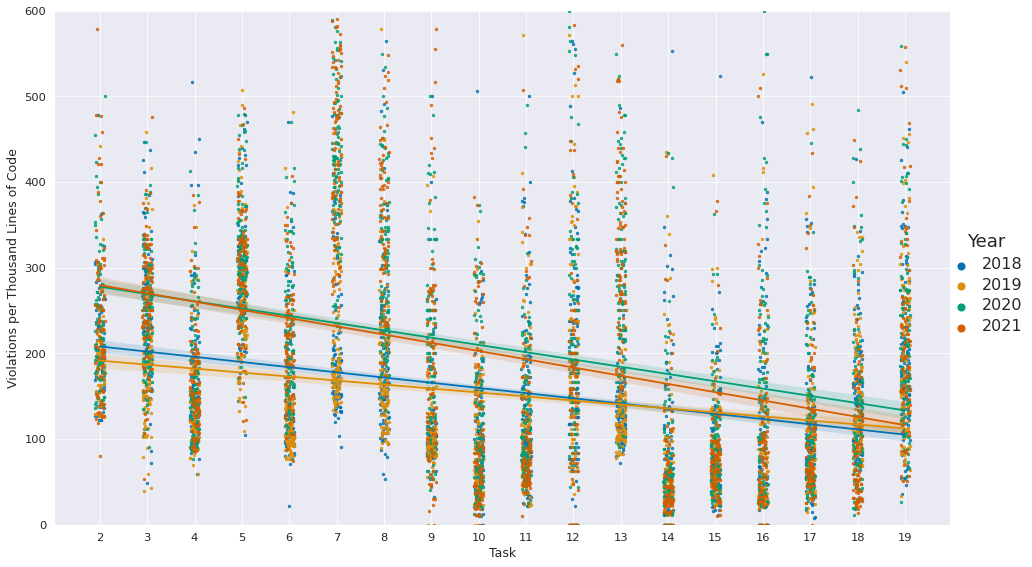

In [32]:
#g = sns.regplot(x = "task",y = "v/kloc",data=dfs_year_sum[dfs_year_sum["year"] == 2020],x_jitter=.1)
#g = sns.regplot(x = "task",y = "v/kloc",data=dfs_year_sum[dfs_year_sum["year"] == 2021],scatter=False)
#sns.set_palette('CMRmap')
sns.set_theme(style="darkgrid")
sns.set_context("paper", font_scale=1.3)
#g.set_title("Violations per 1000 lines of code (KLOC)");
#sns.set(rc={'figure.figsize': (15,8)})
data = df[df["All rules"] == True]

g = sns.lmplot(x="task", 
            y="vPkloc", 
            hue="Year",
            #col="Year",
            #col_wrap=2,
            data=data,
            #x_bins=18,
            truncate=True,
            height=8,
            palette="colorblind",
            aspect=1.7,
            x_jitter=0.1,
            markers=".",
            facet_kws=dict(sharex=True,sharey=True))
g.set(ylim=(0, 600));
g.set(xlabel="Task")
g.set(xticks=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]);
g.set(ylabel="Violations per Thousand Lines of Code");

for lh in g._legend.legendHandles:
    lh.set_alpha(1)
    lh._sizes = [200]

#sns.despine(top=False, right=False)
plt.setp(g._legend.get_texts(), fontsize='16') 
plt.setp(g._legend.get_title(), fontsize='18') 
plt.savefig("year-regression.png",dpi=450)


#plt.savefig("year-regression.ps")
#plt.legend(fontsize='x-large', title_fontsize='40')
#g.set(title="Linear regression over violations per 1000 lines of code (KLOC)");

`df` contains all the vPkloc data with an extra column "All rules" which is false for those rows that don't include the three biggest rules. Either use hue or as below define columns in lmplot based on this column to divide the data.

### Specific rules

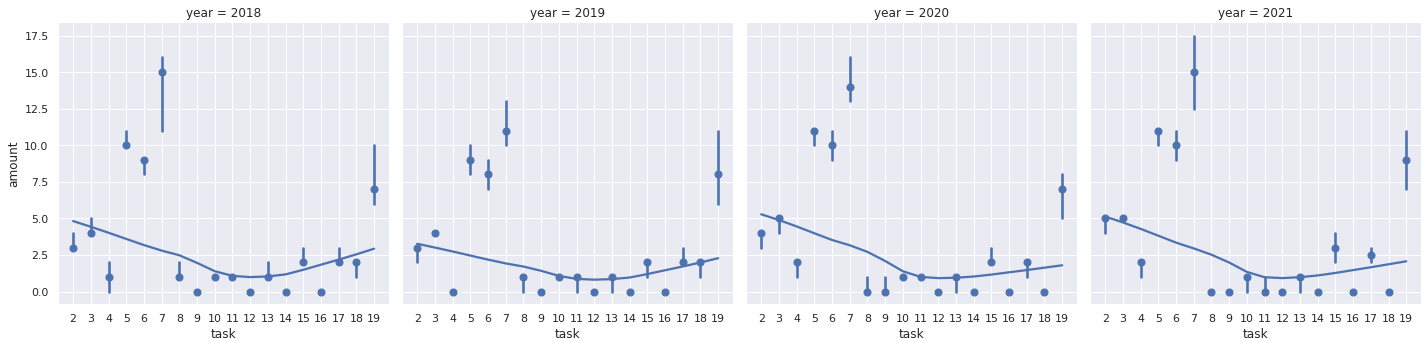

In [33]:
data = dfs_all_years_final.copy()
#data = data[data["year"] == 2019]
rule = "CommentRequired"#"CommentedOutCodeLine"#"SystemPrintln"#"CommentRequired"
sns.set(rc={"figure.figsize":(8,8)},font_scale=1.2)
sns.color_palette("colorblind", 8)
sns.set_theme(style="darkgrid")
data = data[data["violation"] == rule]
#data = data.groupby(["year","task","violation"]).agg(total = ("amount","sum"),median=("amount","median"),mean=("amount","mean"),has=("occur","sum"),outOf=("occur","count")).reset_index()
#data = data[data["has"] > 0]
#data = data.groupby(["year","task","ta"]).agg(violations = ("violation","nunique"))
#data["portion"] = data["violations"]/46
#data = data[data["violation"] != rule]
#data= data[data["task"] > 14]

g = sns.lmplot(x="task", y="amount", col="year", data=data, palette="colorblind", lowess = True, x_estimator=np.median);

data.head()
g.set(xticks=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]);
#g.set(ylabel="Median amount of occurences");
#g.set(xlabel="Task")
#g.set(title=f"Portion of violations occuring in task");
#plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=10)
#plt.savefig(f"{rule}.png",dpi=300)

[Text(0, 0.5, 'Number of Violations'), Text(0.5, 0, 'Task')]

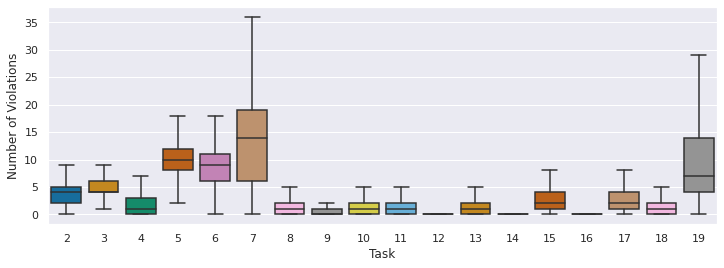

In [82]:
data = dfs_all_years_final.copy()
#data = data[data["year"] == 2019]
rule = "CommentRequired"#"CommentedOutCodeLine"#"SystemPrintln"#"CommentRequired"
sns.set(rc={"figure.figsize":(12,4)},font_scale=1.2)
sns.color_palette("colorblind", 8)
sns.set_theme(style="darkgrid")
data = data[data["violation"] == rule]
g = sns.boxplot(x="task", y="amount", data=data, palette="colorblind", showfliers = False);
g.set(ylabel="Number of Violations", xlabel="Task")


### RQ2

In [34]:
df = dfs_all_years_final.copy()

**Distribution plot over each individual group compared to the course median**

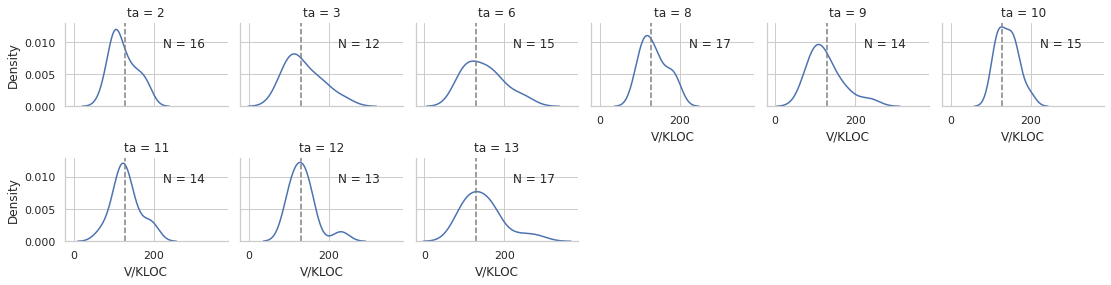

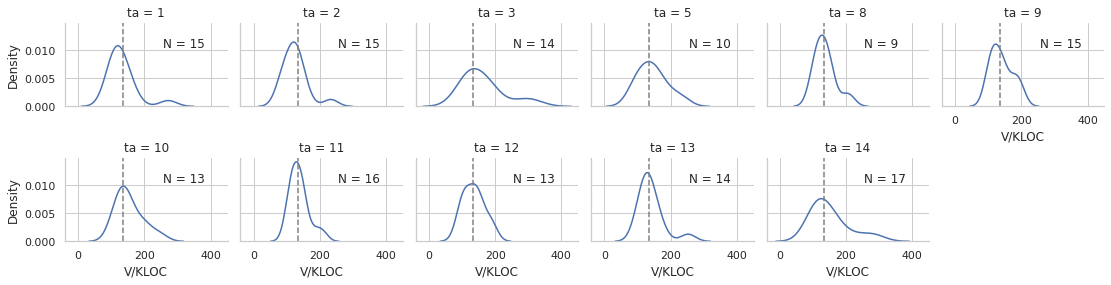

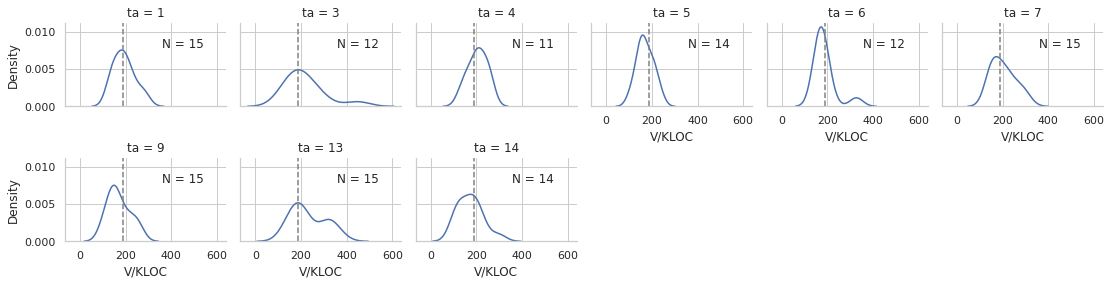

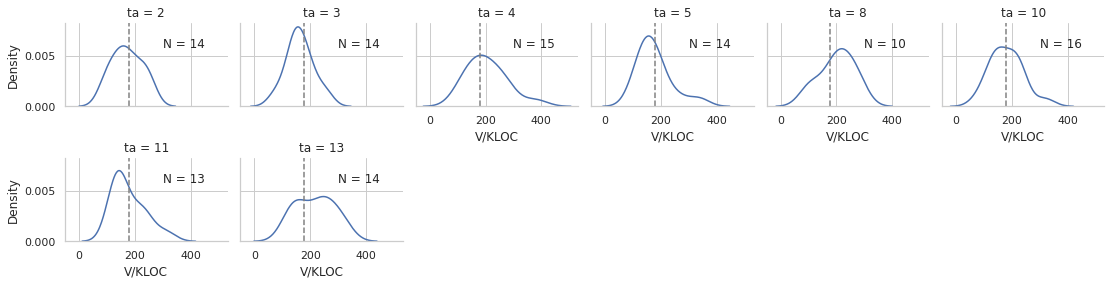

In [35]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.6, .7, f"N = {n}", transform=ax.transAxes)

sns.color_palette("colorblind", 8)
sns.set_theme(style="whitegrid")
df6 = df.groupby(["year","ta","student","task"])["vPkloc"].sum().reset_index()
df6 = df6.groupby(["year","ta","student"])["vPkloc"].median().reset_index()
for year in df["year"].unique():
    df_tmp = df6[df6["year"] == year]
    g = sns.FacetGrid(df_tmp, col="ta", height=2, aspect=1.3, col_wrap=6)
    g.map_dataframe(sns.kdeplot, x = "vPkloc")
    g.map_dataframe(annotate)
    g.set_xlabels("V/KLOC")
    g.refline(x=df_tmp["vPkloc"].median())
    g.fig.subplots_adjust(top=0.93) # adjust the Figure in rp
    #g.fig.suptitle(year)
    plt.savefig(f'ta-dist-{year}.png',dpi=450)

**Distribution of violations and their percentage**

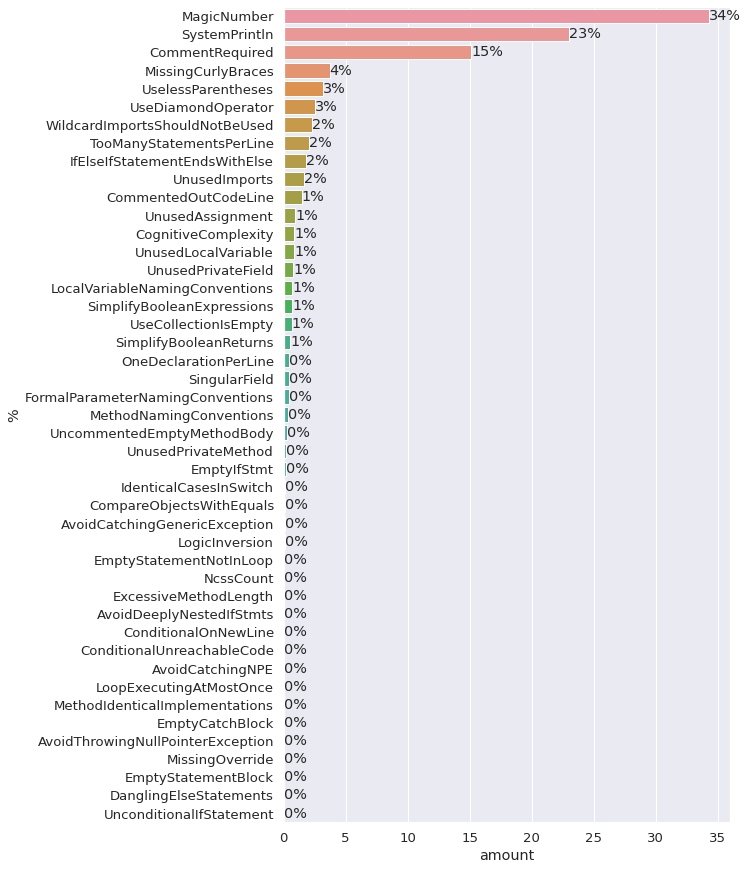

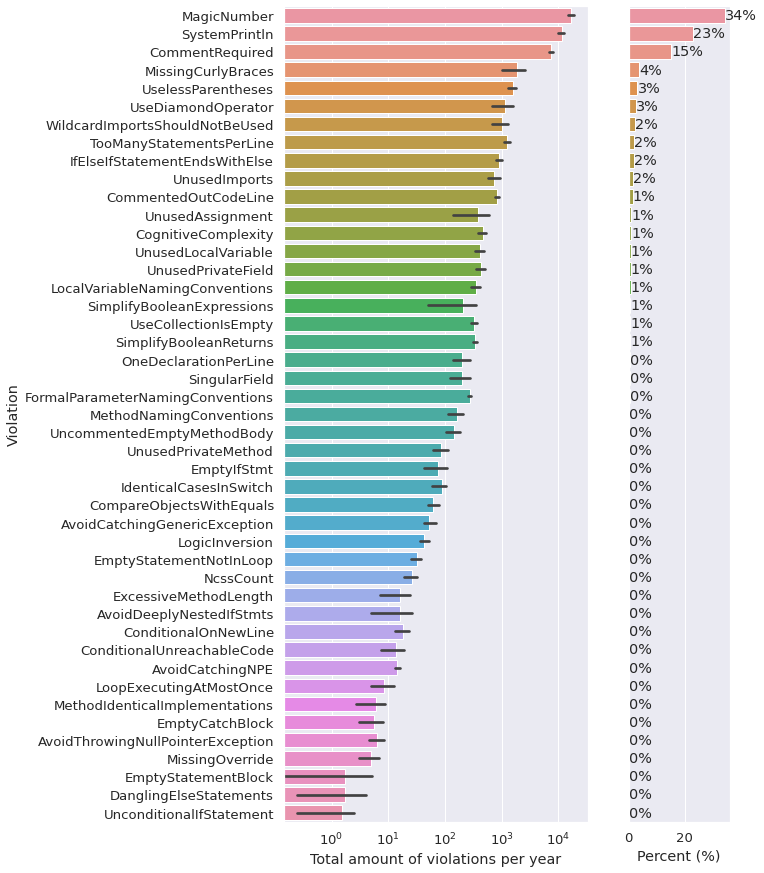

In [69]:
temp = df.groupby(["violation"])["amount"].sum().sort_values(ascending = False).reset_index()
total_violations = temp["amount"].sum()
ax = sns.barplot(x='amount', y='violation', estimator=lambda x: sum(x) / total_violations * 100, data=temp)
ax.bar_label(ax.containers[0], fmt='%.f%%')
ax.set_ylabel('%')
sns.set(font_scale=1.2)

f, axs = plt.subplots(1,2,
                      figsize=(8,15),
                      sharey=True,
                      #font_scale=1.2,
                      gridspec_kw=dict(width_ratios=[3,1]))

df1 = df.groupby(["year","violation"])["amount"].sum().sort_values(ascending = False).reset_index()
sns.barplot(data = df1, y = "violation", x = "amount", log = True, ax=axs[0])

df2 = df.groupby(["violation"])["amount"].sum().sort_values(ascending = False).reset_index()
total_violations = df2["amount"].sum()
sns.barplot(x='amount', y='violation', estimator=lambda x: sum(x) / total_violations * 100, data=df2, ax=axs[1])

axs[1].bar_label(ax.containers[0], fmt='%.f%%');
axs[0].set_xlabel('Total amount of violations per year')
axs[1].set_xlabel('Percent (%)')

axs[1].set_ylabel('')
axs[0].set_ylabel('Violation')

plt.savefig('violations-dist.png',dpi=300, bbox_inches='tight')


**Heatmap**

In [38]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('rg', ["w", "g", "y", "r"], N=256)

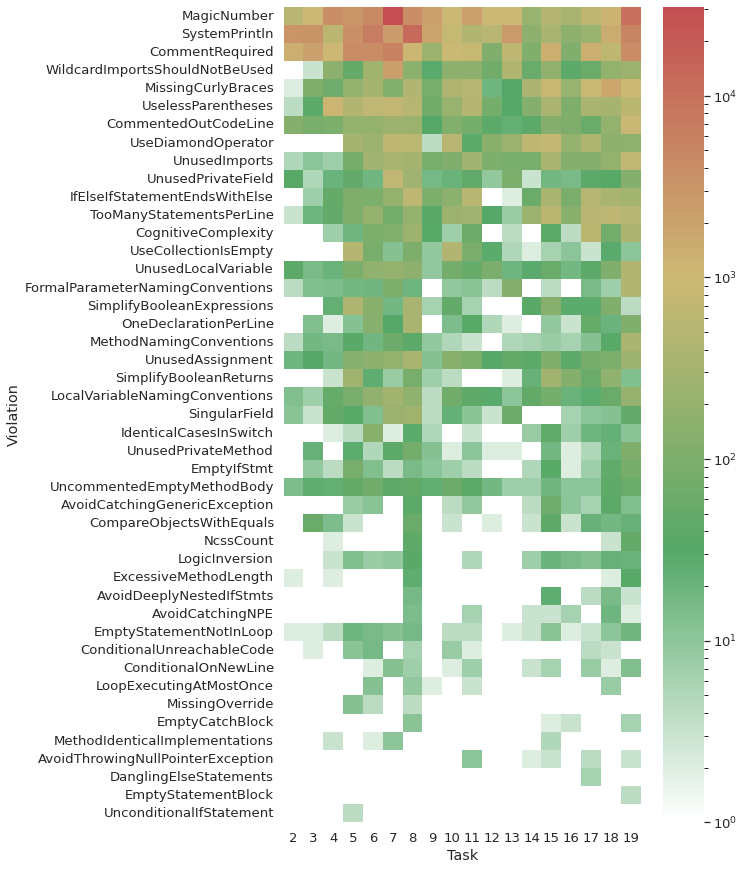

In [68]:
df_violations = df.groupby(["violation", "task"])["amount"].sum().sort_values(ascending = False).reset_index()
sns.set(rc={"figure.figsize":(8,15)},font_scale=1.2)

# Sortera
#df_violations.index = pd.CategoricalIndex(df_violations.index, categories = df_violations["violation"].unique())
#df_violations.sort_index(level=0, inplace=True)

df_violations_pivot = df_violations.pivot("violation", "task", "amount")
df_violations_pivot = df_violations_pivot.reindex(index=df_violations["violation"].unique())

g = sns.heatmap(df_violations_pivot, fmt = "d", cmap=cmap, norm=LogNorm())
g.set_facecolor('xkcd:white')
g.set(ylabel="Violation",xlabel="Task")
plt.savefig('violations-heatmap.png',dpi=450, bbox_inches='tight')

# One plot to rule them all

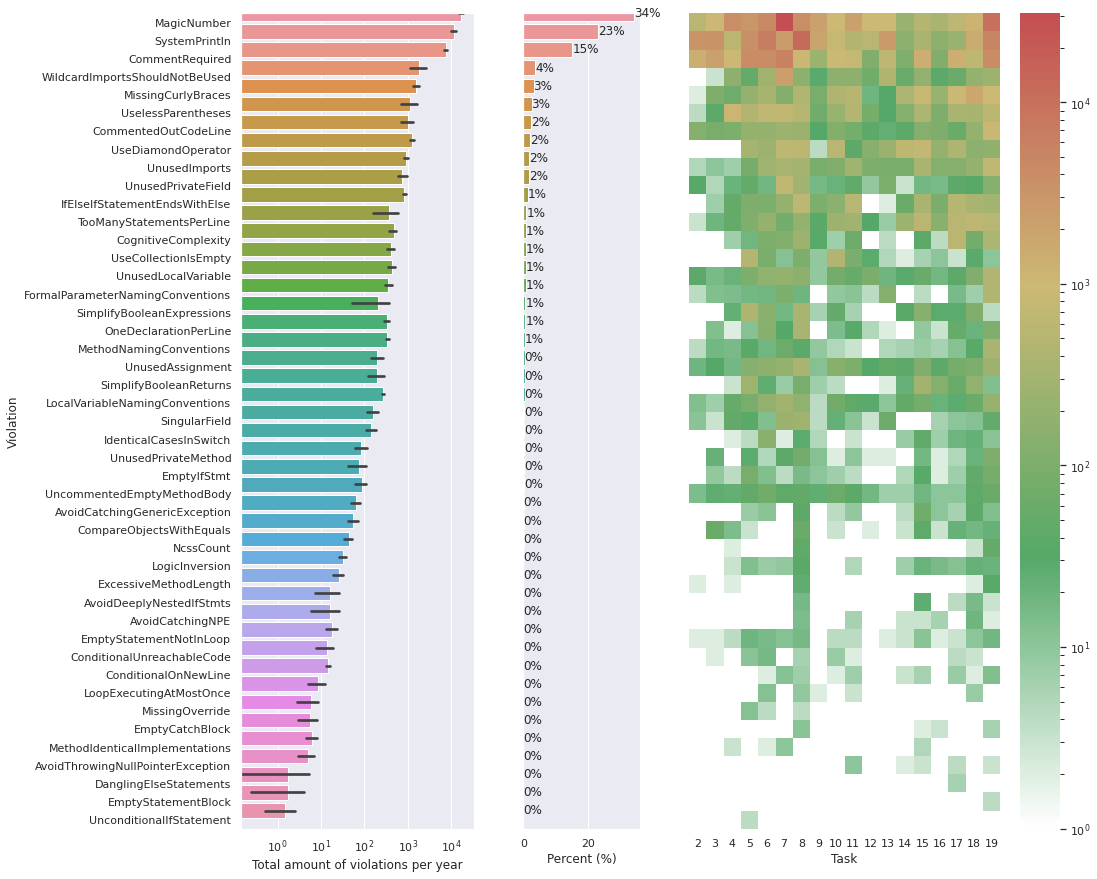

In [72]:
temp = df.groupby(["violation"])["amount"].sum().sort_values(ascending = False).reset_index()
total_violations = temp["amount"].sum()
sns.set(font_scale = 1.2)


f, axs = plt.subplots(1,3,
                      figsize=(15,15),
                      sharey=True,
                      gridspec_kw=dict(width_ratios=[3,1.5,5]))

# Plot distribution
df1 = df.groupby(["year","violation"])["amount"].sum().sort_values(ascending = False).reset_index()
sns.barplot(data = df1, y = "violation", x = "amount", log = True, ax=axs[0])

# Plot percent
df2 = df.groupby(["violation"])["amount"].sum().sort_values(ascending = False).reset_index()
total_violations = df2["amount"].sum()
sns.barplot(x='amount', y='violation', estimator=lambda x: sum(x) / total_violations * 100, data=df2, ax=axs[1])

# Plot heatmap 
sns.heatmap(df_violations_pivot, fmt = "d", cmap=cmap, norm=LogNorm(), ax=axs[2])

axs[2].set_facecolor('xkcd:white')
axs[2].set(ylabel="",xlabel="Task")

axs[1].bar_label(ax.containers[0], fmt='%.f%%');
axs[0].set_xlabel('Total amount of violations per year')
axs[1].set_xlabel('Percent (%)')

axs[1].set_ylabel('')
axs[0].set_ylabel('Violation')




plt.savefig('violations-dist-heatmap.png',dpi=300, bbox_inches='tight')
